# LAPAGE - Analyse des ventes & Etudes des données clients

# Introduction

In [1]:
## Importation des modules & librairies

import numpy as np # Calculs numériques et opérations mathématiques
import pandas as pd # Manipulation et analyse de données
import matplotlib.pyplot as plt # Création de graphiques et visualisations
import plotly.express as px # Visualisation interactive des données
import seaborn as sns # Visualisations statistiques avancées
from datetime import datetime # Manipulation des dates et données temporelles
from scipy import stats as st # Fonctionnalités statistiques et tests d'hypothèses
import scipy.stats as stats # Autres fonctionnalités statistiques et tests d'hypothèses
from scipy.stats import chi2_contingency # Test d'indépendance du khi-2
from scipy.stats import shapiro, f_oneway, kruskal # Tests statistiques : Shapiro-Wilk, ANOVA à un facteur, Kruskal-Wallis
import statsmodels.api as sm # Modélisation statistique et économétrique

In [2]:
## Mise en place des fonctions
def explore_dataframe(data_to_analyse):
    """
    Effectue une analyse exploratoire basique sur un dataframe donné.

    Parameters:
    data_to_analyse (DataFrame): Le dataframe à analyser.
    """
    # Dimensions du dataframe
    print('*' * 40 + " DIMENSIONS " + '*' * 44)
    print(f"Le dataframe comporte {data_to_analyse.shape[1]} variable(s) pour {data_to_analyse.shape[0]} observation(s).")

    # Typologies des variables
    print('*' * 40 + " TYPOLOGIES " + '*' * 44)
    for col, dtype in data_to_analyse.dtypes.items():
        print(f"{col} : {dtype}")

    # Effectifs des variables
    print('*' * 40 + " EFFECTIFS " + '*' * 45)
    for col, count in data_to_analyse.describe(include='all').loc['count'].items():
        print(f"{col} : {count}")

    # Valeurs nulles dans le dataframe
    print('*' * 40 + " VALEURS NULLES " + '*' * 40)
    for col, count in data_to_analyse.isnull().sum().items():
        print(f"{col} : {count}")

    # Duplicats dans le dataframe
    print('*' * 40 + " DUPLICATS " + '*' * 45)
    for col, count in data_to_analyse[data_to_analyse.duplicated()].count().items():
        print(f"{col} : {count}")

In [3]:
## Importation des données initiales
customers_data = pd.read_csv("customers.csv", sep=';')
products_data = pd.read_csv("products.csv", sep=';')
transactions_data = pd.read_csv("Transactions.csv", sep=';', low_memory=False)

# Analyses exploratoires et préparation des données

## Données extraites du fichier client

In [4]:
## Analyse exploratoire
explore_dataframe(customers_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 3 variable(s) pour 8621 observation(s).
**************************************** TYPOLOGIES ********************************************
client_id : object
sex : object
birth : int64
**************************************** EFFECTIFS *********************************************
client_id : 8621
sex : 8621
birth : 8621.0
**************************************** VALEURS NULLES ****************************************
client_id : 0
sex : 0
birth : 0
**************************************** DUPLICATS *********************************************
client_id : 0
sex : 0
birth : 0


In [5]:
## Préparation des données

# Modifier le nom des variables
customers_data = customers_data.rename(
    columns={'sex': 'gender', 'birth': 'birth_year'})

# Aperçu des valeurs uniques au sein de la variable "gender"
# print(f"Liste des valeurs uniques au sein de la variable 'gender' : {customers_data['gender'].unique()}")
# Modifier la typologie des variables
customers_data['gender'] = customers_data['gender'].astype('category')

In [6]:
## Vérifications de la cohérence des données clients

# Liste des valeurs uniques de la variable "client_id"
print(f"Liste des identifiants clients : {customers_data['client_id'].unique()}.")
print("")
# Aperçu du nombre de valeurs uniques au sein de la variable "client_id"
print(f"Nombre de clients référencés : {customers_data['client_id'].nunique()}.")
print("")
# Contrôle du format des identifiants clients
all_customers_start_with_c_ = customers_data["client_id"].str.startswith("c_").all()
if all_customers_start_with_c_:
    print("Tous les identifiants semblent cohérents et correctement formatés.")
else:
    print("❌ Certains identifiants semblent incohérents.")

# Liste des valeurs uniques de la variable "client_id"
# unique_birth_years = customers_data["birth_year"].unique()
# Trier les valeurs uniques par ordre croissant
# unique_birth_years.sort()
# Aperçu des années de naissance référencées dans le fichier client
# print(unique_birth_years)

Liste des identifiants clients : ['c_4410' 'c_7839' 'c_1699' ... 'c_5119' 'c_5643' 'c_84'].

Nombre de clients référencés : 8621.

Tous les identifiants semblent cohérents et correctement formatés.


In [7]:
## Informations complémentaires

# Date actuelle
current_year = datetime.now().year
# Calcul de l'âge de chaque client à partir de l'année de naissance
customers_data['age'] = current_year - customers_data['birth_year']
# Suppression de la date de naissance, désormais facultative
customers_data = customers_data.drop(columns=['birth_year'])

Le fichier *Customers* contient 8621 clients.

Il nous fournit :

*   L'identifiant client : c_#####
*   Le genre du client
*   L'âge du client

## Données extraites du fichier produit

In [8]:
## Analyse exploratoire
explore_dataframe(products_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 3 variable(s) pour 3286 observation(s).
**************************************** TYPOLOGIES ********************************************
id_prod : object
price : float64
categ : int64
**************************************** EFFECTIFS *********************************************
id_prod : 3286
price : 3286.0
categ : 3286.0
**************************************** VALEURS NULLES ****************************************
id_prod : 0
price : 0
categ : 0
**************************************** DUPLICATS *********************************************
id_prod : 0
price : 0
categ : 0


In [9]:
## Préparation des données

# Modifier le nom des variables
products_data = products_data.rename(
    columns={'id_prod': 'product_id', 'categ': 'category'})
# Aperçu des valeurs uniques au sein de la variable "category"
# print(f"Liste des valeurs uniques au sein de la variable 'category' : {products_data['category'].unique()}")
# Modifier la typologie des variables
products_data['category'] = products_data['category'].astype('category')

In [10]:
## Vérifications de la cohérence des données produits

# Liste des valeurs uniques de la variable "product_id"
print(f"Liste des identifiants produits : {products_data['product_id'].unique()}.")
print("")
# Aperçu du nombre de valeurs uniques au sein de la variable "product_id"
print(f"Nombre de produits référencés : {products_data['product_id'].nunique()}.")
print("")
# Contrôle du format des identifiants produits
filtered_values = products_data[~products_data['product_id'].str.match(r'^[0-2]')]
if not filtered_values.empty:
    print("❌ Certains identifiants semblent incohérents.")
    print("")
else:
    print("Tous les identifiants semblent cohérents et correctement formatés.")
    print("")
# Contrôle de la cohérence des prix
print(f"Nombre de prix négatifs : {products_data.loc[products_data['price'] <= 0]['price'].count()}")
print("")
# Prix minimum
print(f"Prix minimum : {products_data['price'].min()} €.")
print("")
# Prix maximum
print(f"Prix maximum : {products_data['price'].max()} €.")
# Calcul du nombre de produit référencé par catégorie
occurrences = products_data["category"].value_counts()
total_occurrences = occurrences.sum()
# Aperçu du nombre de produit référencé par catégorie
print("\nNombre d'occurrences par catégorie:")
print(occurrences)

## Contrôle de conformité

# Création d'une nouvelle variable 'category_id' contenant le premier caractère de 'product_id'
# products_data['category_id'] = products_data['product_id'].apply(lambda x: int(x[0]))
# Aperçu des observations où les valeurs sont différentes entre 'category' et 'category_id'
# verification_product_id = products_data.loc[products_data['category'] != products_data['category_id']]
# if verification_product_id.empty:
    # products_data.drop(columns=['category_id'], inplace=True)
    # print("Tous les identifiants produits sont cohérents.")
# else:
    # print("❌ Les observations où les valeurs de 'category' et 'category_id' ne correspondent pas sont :")
    # print(verification_product_id)#

Liste des identifiants produits : ['0_1421' '0_1368' '0_731' ... '0_802' '1_140' '0_1920'].

Nombre de produits référencés : 3286.

Tous les identifiants semblent cohérents et correctement formatés.

Nombre de prix négatifs : 0

Prix minimum : 0.62 €.

Prix maximum : 300.0 €.

Nombre d'occurrences par catégorie:
category
0    2308
1     739
2     239
Name: count, dtype: int64


Le fichier *Products* contient 3286 produits.

Il nous fournit :

*   L'identifiant produit : category_#####
*   Le prix du produit
*   La categorie du produit

## Données extraites du fichier transactions

In [11]:
## Analyse exploratoire
explore_dataframe(transactions_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 4 variable(s) pour 1048575 observation(s).
**************************************** TYPOLOGIES ********************************************
id_prod : object
date : object
session_id : object
client_id : object
**************************************** EFFECTIFS *********************************************
id_prod : 687534
date : 687534
session_id : 687534
client_id : 687534
**************************************** VALEURS NULLES ****************************************
id_prod : 361041
date : 361041
session_id : 361041
client_id : 361041
**************************************** DUPLICATS *********************************************
id_prod : 0
date : 0
session_id : 0
client_id : 0


In [12]:
## Préparation des données

# Modifier le nom des variables
transactions_data = transactions_data.rename(
    columns={'id_prod': 'product_id', 'date': 'transaction_date'})
# Modifier la typologie des variables
try:
    transactions_data['transaction_date'] = pd.to_datetime(transactions_data['transaction_date'])
except ValueError as erreur:
    print(erreur)
# Aperçu des observations contenants des valeurs nulles
# dataframe_valeurs_nulles = transactions_data[transactions_data.isnull().any(axis=1)]
# Suppression des observations non pertinentes (valeurs nulles)
transactions_data.dropna(inplace=True)

In [13]:
## Analyse exploratoire
explore_dataframe(transactions_data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 4 variable(s) pour 687534 observation(s).
**************************************** TYPOLOGIES ********************************************
product_id : object
transaction_date : datetime64[ns]
session_id : object
client_id : object
**************************************** EFFECTIFS *********************************************
product_id : 687534
transaction_date : 687534
session_id : 687534
client_id : 687534
**************************************** VALEURS NULLES ****************************************
product_id : 0
transaction_date : 0
session_id : 0
client_id : 0
**************************************** DUPLICATS *********************************************
product_id : 0
transaction_date : 0
session_id : 0
client_id : 0


In [14]:
## Vérifications de la cohérence des données produits liées aux transactions

# Liste des valeurs uniques de la variable "product_id"
print(f"Liste des identifiants produits : {transactions_data['product_id'].unique()}.")
print("")
# Aperçu du nombre de valeurs uniques au sein de la variable "product_id"
print(f"Nombre de produits référencés : {transactions_data['product_id'].nunique()}.")
print("")
# Calcul du nombre de produit non référencés au sein du fichier "Transactions"
nombre_produit_sans_achat = products_data["product_id"].nunique() - transactions_data["product_id"].nunique()
print(f"{nombre_produit_sans_achat} références produits n'ont pas été retrouvés au sein du fichier Transactions.")
print(f"Il semble donc que {nombre_produit_sans_achat} produits en stock n'ont pas été vendus sur la période observée.")
print("")
# Contrôle du format des identifiants produits
filtered_values = products_data[~products_data['product_id'].str.match(r'^[0-2]')]
if not filtered_values.empty:
    print("❌ Certains identifiants semblent incohérents.")
    print("")
else:
    print("Tous les identifiants semblent cohérents et correctement formatés.")
    print("")
# Calcul du nombre de transaction par année
transactions_per_year = transactions_data['transaction_date'].dt.year.value_counts().sort_index()
print("Nombre de transactions par année:")
print(transactions_per_year)
# Calcul du total des transactions
total_transactions = transactions_per_year.sum()
print("\nTotal des transactions:", total_transactions)
print("")
# Plage temporelle des transactions enregistrées
first_date = transactions_data['transaction_date'].min()
last_date = transactions_data['transaction_date'].max()
# Conversion des dates au format datetime
first_date_dt = datetime.strptime(str(first_date), '%Y-%m-%d %H:%M:%S.%f')
last_date_dt = datetime.strptime(str(last_date), '%Y-%m-%d %H:%M:%S.%f')
# Conversion au format datetime souhaité
first_date = first_date_dt.strftime('%A %d %B - %H:%M')
last_date = last_date_dt.strftime('%A %d %B - %H:%M')
# Aperçu du résultat
print(f'Date du premier enregistrement : {first_date}.')
print("")
print(f'Date du dernier enregistrement : {last_date}.')
print("")
# Séparation de la date en différentes variables
transactions_data.loc[:, 'année'] = transactions_data['transaction_date'].dt.year
transactions_data.loc[:, 'mois'] = transactions_data['transaction_date'].dt.month
transactions_data.loc[:, 'jour'] = transactions_data['transaction_date'].dt.day
transactions_data.loc[:, 'heure'] = transactions_data['transaction_date'].dt.hour
# Liste des valeurs uniques de la variable "session_id"
print(f"Liste des identifiants sessions : {transactions_data['session_id'].unique()}.")
print("")
# Aperçu du nombre de valeurs uniques au sein de la variable "session_id"
print(f"Nombre de sessions référencés : {transactions_data['session_id'].nunique()}.")
print("")
# Contrôle du format des identifiants sessions
all_session_start_with_s_ = transactions_data["session_id"].str.startswith("s_").all()
if all_session_start_with_s_:
    print("Tous les identifiants semblent cohérents et correctement formatés.")
    print("")
else:
    print("❌ Certains identifiants semblent incohérents.")
    print("")

# Liste des valeurs uniques de la variable "client_id"
print(f"Liste des identifiants clients : {transactions_data['client_id'].unique()}.")
print("")
# Aperçu du nombre de valeurs uniques au sein de la variable "client_id"
print(f"Nombre de clients référencés : {transactions_data['client_id'].nunique()}.")
print("")
# Calcul du nombre de clients non référencés au sein du fichier "Transactions"
nombre_client_sans_session = customers_data["client_id"].nunique() - transactions_data["client_id"].nunique()
print(f"{nombre_client_sans_session} clients sont enregistrés mais n'ont pas effectués de transactions sur la période.")
print("")
# Contrôle du format des identifiants clients
all_session_start_with_s_ = transactions_data["session_id"].str.startswith("s_").all()
iall_customers_start_with_c_ = customers_data["client_id"].str.startswith("c_").all()
if all_customers_start_with_c_:
    print("Tous les identifiants semblent cohérents et correctement formatés.")
else:
    print("❌ Certains identifiants semblent incohérents.")
# Ré-organisation des variables pour une meilleur lisibilité
transactions_data = transactions_data.reindex(columns=['session_id', 'client_id', 'product_id', 'heure', 'jour', 'mois', 'année', 'transaction_date'])

Liste des identifiants produits : ['0_1259' '0_1390' '0_1352' ... '0_1576' '0_433' '0_1633'].

Nombre de produits référencés : 3265.

21 références produits n'ont pas été retrouvés au sein du fichier Transactions.
Il semble donc que 21 produits en stock n'ont pas été vendus sur la période observée.

Tous les identifiants semblent cohérents et correctement formatés.

Nombre de transactions par année:
transaction_date
2021    286671
2022    346380
2023     54483
Name: count, dtype: int64

Total des transactions: 687534

Date du premier enregistrement : Monday 01 March - 00:01.

Date du dernier enregistrement : Tuesday 28 February - 23:58.

Liste des identifiants sessions : ['s_1' 's_2' 's_3' ... 's_348445' 's_348446' 's_348447'].

Nombre de sessions référencés : 345505.

Tous les identifiants semblent cohérents et correctement formatés.

Liste des identifiants clients : ['c_329' 'c_664' 'c_580' ... 'c_3058' 'c_2566' 'c_177'].

Nombre de clients référencés : 8600.

21 clients sont enregis

In [15]:
# Nombre de transactions par session
count_transactions = transactions_data.groupby('session_id').size().reset_index(name='transaction_count').sort_values(by='transaction_count', ascending=False)
count_transactions

session_id  transaction_count
20739    s_118668                 14
88294    s_179575                 13
127397   s_215292                 13
121660    s_21005                 13
342015    s_96857                 13
...           ...                ...
157285   s_242637                  1
157288    s_24264                  1
157289   s_242640                  1
157290   s_242641                  1
172752   s_256790                  1

[345505 rows x 2 columns]

Le fichier *Transactions* contient 687534 transactions pour 345505 sessions uniques.

Il nous fournit :

*   L'identifiant produit : category_#####
*   La date de la transaction : Année, Mois, Jour, Heure
*   L'identifiant session : s_####
*   L'identifiant client : c_####

## Fusion des données

Nous avons précedemment observé :

- Qu'un client peut ne pas avoir effectué de transaction.
- Qu'un produit peut ne pas avoir été acheté.

Pour l'instant, on souhaite conserver toutes ces informations.

Nous allons donc procéder à des fusions dites 'externes'.



In [16]:
## Jonction des fichiers 'transactions_data' et 'customers_data'

# Fusion 'transactions_data' et 'customers_data' ON 'client_id'
transactions_customers = pd.merge(transactions_data, customers_data, on='client_id', how='outer', indicator = True)

## Contrôle des duplicats et contrôle des correspondances

# Détection de potentielles valeurs ne matchant pas - Absence de correspondances
nombre_valeur_no_match = transactions_customers[transactions_customers["_merge"] != "both"]['_merge'].count()
if nombre_valeur_no_match == 0:
  print(f" ✅ Aucun problème de correspondance détécté.")
  # Suppression de la variable '_merge'
  transactions_customers.drop('_merge', axis=1, inplace=True)
else :
  liste_erreur_fusion = transactions_customers[transactions_customers["_merge"] != "both"]
  print(f" ❌ {nombre_valeur_no_match} observations n'ont pas trouvé de correspondance.")
  print(liste_erreur_fusion)
  # Suppression de la variable '_merge'
  transactions_customers.drop('_merge', axis=1, inplace=True)

 ❌ 21 observations n'ont pas trouvé de correspondance.
       session_id client_id product_id  heure  jour  mois  année  \
687534        NaN    c_8253        NaN    NaN   NaN   NaN    NaN   
687535        NaN    c_3789        NaN    NaN   NaN   NaN    NaN   
687536        NaN    c_4406        NaN    NaN   NaN   NaN    NaN   
687537        NaN    c_2706        NaN    NaN   NaN   NaN    NaN   
687538        NaN    c_3443        NaN    NaN   NaN   NaN    NaN   
687539        NaN    c_4447        NaN    NaN   NaN   NaN    NaN   
687540        NaN    c_3017        NaN    NaN   NaN   NaN    NaN   
687541        NaN    c_4086        NaN    NaN   NaN   NaN    NaN   
687542        NaN    c_6930        NaN    NaN   NaN   NaN    NaN   
687543        NaN    c_4358        NaN    NaN   NaN   NaN    NaN   
687544        NaN    c_8381        NaN    NaN   NaN   NaN    NaN   
687545        NaN    c_1223        NaN    NaN   NaN   NaN    NaN   
687546        NaN    c_6862        NaN    NaN   NaN   NaN    

On retrouve les 21 clients enregistrés au sein de la base de donnée mais qui n'ont jamais effectué d'achat sur la période analysée.  

In [17]:
## Jonction des fichiers 'transactions_customers' et 'products_data'

# Fusion 'transactions_customers' et 'products_data' ON 'product_id'
data = pd.merge(transactions_customers, products_data, on='product_id', how='outer', indicator = True)

## Contrôle des duplicats et contrôle des correspondances

# Détection de potentielles valeurs ne matchant pas - Absence de correspondances
merge_2_no_match = data[data["_merge"] != "both"]['_merge'].count()
if merge_2_no_match == 0:
  print(f" ✅ Aucun problème de correspondance détécté.")
  # Suppression de la variable '_merge'
  data.drop('_merge', axis=1, inplace=True)
else :
  liste_erreur_fusion_2 = data[data["_merge"] != "both"]
  print(f" ❌ {merge_2_no_match} observations n'ont pas trouvé de correspondance.")
  print(liste_erreur_fusion_2)

 ❌ 42 observations n'ont pas trouvé de correspondance.
       session_id client_id product_id  heure  jour  mois  année  \
687534        NaN    c_8253        NaN    NaN   NaN   NaN    NaN   
687535        NaN    c_3789        NaN    NaN   NaN   NaN    NaN   
687536        NaN    c_4406        NaN    NaN   NaN   NaN    NaN   
687537        NaN    c_2706        NaN    NaN   NaN   NaN    NaN   
687538        NaN    c_3443        NaN    NaN   NaN   NaN    NaN   
687539        NaN    c_4447        NaN    NaN   NaN   NaN    NaN   
687540        NaN    c_3017        NaN    NaN   NaN   NaN    NaN   
687541        NaN    c_4086        NaN    NaN   NaN   NaN    NaN   
687542        NaN    c_6930        NaN    NaN   NaN   NaN    NaN   
687543        NaN    c_4358        NaN    NaN   NaN   NaN    NaN   
687544        NaN    c_8381        NaN    NaN   NaN   NaN    NaN   
687545        NaN    c_1223        NaN    NaN   NaN   NaN    NaN   
687546        NaN    c_6862        NaN    NaN   NaN   NaN    

On retrouve les 21 clients sans correspondances, ainsi que les 21 références produits en stock et qui enregistre aucun achats.

Nous allons conserver seulement les transactions ayant abouties à un achat pour notre analyse.

In [18]:
# Suppression des transactions n'ayant pas abouties à une vente.
ventes = data.dropna()
print(f"Nombre d'observations supprimées : {data.shape[0]-ventes.shape[0]}")

Nombre d'observations supprimées : 42


In [19]:
## Analyse exploratoire
explore_dataframe(ventes)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 13 variable(s) pour 687534 observation(s).
**************************************** TYPOLOGIES ********************************************
session_id : object
client_id : object
product_id : object
heure : float64
jour : float64
mois : float64
année : float64
transaction_date : datetime64[ns]
gender : category
age : float64
price : float64
category : category
_merge : category
**************************************** EFFECTIFS *********************************************
session_id : 687534
client_id : 687534
product_id : 687534
heure : 687534.0
jour : 687534.0
mois : 687534.0
année : 687534.0
transaction_date : 687534
gender : 687534
age : 687534.0
price : 687534.0
category : 687534.0
_merge : 687534
**************************************** VALEURS NULLES ****************************************
session_id : 0
client_id : 0
product_id : 0
heure : 0
jour : 0
mois : 0

In [20]:
## Préparation des données

# Modifier la typologie des variables
colonnes_a_convertir = ['année', 'mois', 'jour', 'heure', 'age']
for colonne in colonnes_a_convertir:
    ventes[colonne] = ventes[colonne].astype(int)
# Création d'une variable 'mois_complet'
ventes['mois_complet'] = ventes['année'].astype(str) + '-' + ventes['mois'].astype(str).str.zfill(2)
# Re-organisation des variables pour une meilleur lisibilité
ventes = ventes[['session_id', 'transaction_date', 'heure', 'jour', 'mois','mois_complet', 'année',
                 'product_id', 'price', 'category', 'client_id', 'age', 'gender']]

<ipython-input-20-e0a08e515181>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes[colonne] = ventes[colonne].astype(int)
<ipython-input-20-e0a08e515181>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes[colonne] = ventes[colonne].astype(int)
<ipython-input-20-e0a08e515181>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

# Analyses statistiques et descriptives

## Analyse du chiffre d'affaires

In [21]:
## Chiffre d'affaires Global

# Calcul du chiffre d'affaires global réalisé sur la période
chiffre_affaire = ventes['price'].sum()
print(f"Le chiffre d'affaire global sur la période est de {round(chiffre_affaire, 2)} €")

Le chiffre d'affaire global sur la période est de 12027663.1 €


In [22]:
## Chiffre d'affaires Annuel

# Chiffre d'affaire annuel
chiffre_affaire_annuel = ventes.groupby(["année"])["price"].sum().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(chiffre_affaire_annuel, x='année', y='price', title='Chiffre d\'affaire annuel')

# Gestion des titres
fig.update_xaxes(title='Année') # # Titres des abscisses
fig.update_yaxes(title='Chiffre d\'affaire') # Titres des ordonnées
fig.update_xaxes(tickvals=chiffre_affaire_annuel['année'])

# Affichage du graphique
fig.show()

In [23]:
## Chiffre d'affaires Mensuel

# Chiffre affaire mensuel
chiffre_affaire_mensuel = ventes.groupby(["mois_complet"])["price"].sum().reset_index()

## LineCharts interactifs

# Préparation des données pour le graphique
fig = px.line(chiffre_affaire_mensuel, x='mois_complet', y='price', title='Chiffre d\'affaire mensuel')

# Gestion des titres
fig.update_xaxes(title='Mois') # # Titres des abscisses
fig.update_yaxes(title='Chiffre d\'affaire') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [24]:
## Chiffre d'affaires par catégorie

# Calcul du chiffre d'affaire par catégorie
chiffre_affaires_category = ventes.groupby('category')['price'].sum()

## Piecharts interactifs

# Préparation des données pour le graphique
fig = px.pie(chiffre_affaires_category, names=chiffre_affaires_category.index, values='price', title='Répartition du chiffre d\'affaire par catégorie')

# Affichage du graphique
fig.show()

In [25]:
## Chiffre d'affaires mensuel par catégorie

# Calcul du chiffre d'affaire par catégorie et par mois
chiffre_affaires_category = ventes.groupby(['mois_complet', 'category'])['price'].sum().reset_index()

# Trier les données par ordre chronologique
chiffre_affaires_category = chiffre_affaires_category.sort_values('mois_complet')

# Préparation du graphique interactif
fig = px.line(chiffre_affaires_category, x='mois_complet', y='price', color='category', title="Évolution du chiffre d'affaires par catégorie")

# Gestion des titres
fig.update_xaxes(title='Mois')  # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaires")  # Titres des ordonnées

# Affichage du graphique
fig.show()

In [26]:
## Moyenne mobile sur trois semaines

# Calcul du chiffre d'affaire total pour chaque semaine
weekly_revenue = ventes.groupby(pd.Grouper(key='transaction_date', freq='W')).sum(numeric_only=True)['price']

# Calcul de la moyenne mobile sur trois semaines
rolling_avg_weekly = weekly_revenue.rolling(window=3).mean()

# Préparation des données pour Plotly
data = pd.DataFrame({
    'Date': weekly_revenue.index,
    'Chiffre d\'affaire hebdomadaire': weekly_revenue.values,
    'Moyenne mobile sur 3 semaines': rolling_avg_weekly.values
})

# Préparation du graphique interactif
fig = px.line(data, x='Date', y=['Chiffre d\'affaire hebdomadaire', 'Moyenne mobile sur 3 semaines'],
              labels={'value': "Chiffre d'affaire", 'variable': 'Légende'},
              title="Évolution du chiffre d'affaire avec moyenne mobile sur 3 semaines")

# Gestion des titres
fig.update_xaxes(title='Date')  # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaire")  # Titres des ordonnées

# Affichage du graphique
fig.show()

In [27]:
## Moyenne mobile sur trois mois

# Calcul du chiffre d'affaire total pour chaque mois
monthly_revenue = ventes.groupby('mois_complet').sum(numeric_only=True)['price']

# Calcul de la moyenne mobile sur trois mois
rolling_avg = monthly_revenue.rolling(window=3).mean()

# Préparation des données pour Plotly
data = pd.DataFrame({
    'Date': monthly_revenue.index,
    'Chiffre d\'affaire mensuel': monthly_revenue.values,
    'Moyenne mobile sur 3 mois': rolling_avg.values
})

# Préparation du graphique interactif
fig = px.line(data, x='Date', y=['Chiffre d\'affaire mensuel', 'Moyenne mobile sur 3 mois'],
              labels={'value': "Chiffre d'affaire", 'variable': 'Légende'},
              title="Évolution du chiffre d'affaire avec moyenne mobile sur 3 mois")

# Gestion des titres
fig.update_xaxes(title='Date')  # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaire")  # Titres des ordonnées

# Affichage du graphique
fig.show()

In [28]:
# Calcul du chiffre d'affaire total pour chaque mois
monthly_revenue = ventes.groupby('mois_complet').sum(numeric_only=True)['price']

# Calcul de la moyenne mobile centrée sur trois mois
centered_rolling_avg = monthly_revenue.rolling(window=3, center=True).mean()

# Préparation des données pour Plotly
data = pd.DataFrame({
    'Date': monthly_revenue.index,
    'Chiffre d\'affaire mensuel': monthly_revenue.values,
    'Moyenne mobile centrée sur 3 mois': centered_rolling_avg.values
})

# Préparation du graphique interactif
fig = px.line(data, x='Date', y=['Chiffre d\'affaire mensuel', 'Moyenne mobile centrée sur 3 mois'],
              labels={'value': "Chiffre d'affaire", 'variable': 'Légende'},
              title="Évolution du chiffre d'affaire avec moyenne mobile centrée sur 3 mois")

# Gestion des titres
fig.update_xaxes(title='Date')  # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaire")  # Titres des ordonnées

# Affichage du graphique
fig.show()

In [29]:
# Calcul du chiffre d'affaire total pour chaque mois
monthly_revenue = ventes.groupby('mois_complet').sum(numeric_only=True)['price']

# Calcul de la moyenne mobile centrée sur six mois
centered_rolling_avg = monthly_revenue.rolling(window=6, center=True).mean()

# Préparation des données pour Plotly
data = pd.DataFrame({
    'Date': monthly_revenue.index,
    'Chiffre d\'affaire mensuel': monthly_revenue.values,
    'Moyenne mobile centrée sur 6 mois': centered_rolling_avg.values
})

# Préparation du graphique interactif
fig = px.line(data, x='Date', y=['Chiffre d\'affaire mensuel', 'Moyenne mobile centrée sur 6 mois'],
              labels={'value': "Chiffre d'affaire", 'variable': 'Légende'},
              title="Évolution du chiffre d'affaire avec moyenne mobile centrée sur 6 mois")

# Gestion des titres
fig.update_xaxes(title='Date')  # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaire")  # Titres des ordonnées

# Affichage du graphique
fig.show()

## Analyse des ventes

In [30]:
# Calcul du nombre de ventes global sur la période
nombre_de_ventes = ventes['price'].count()
print(f"{nombre_de_ventes} ventes ont été effectués sur la période.")

687534 ventes ont été effectués sur la période.


In [31]:
## Nombre de ventes Annuel

# Calcul du nombre de ventes annuel
ventes_annuel = ventes.groupby(["année"])["price"].count().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(ventes_annuel, x='année', y='price', title='Nombre de ventes annuel')

# Gestion des titres
fig.update_xaxes(title='Année') # # Titres des abscisses
fig.update_yaxes(title='Nombre de ventes') # Titres des ordonnées
fig.update_xaxes(tickvals=chiffre_affaire_annuel['année'])

# Affichage du graphique
fig.show()

In [32]:
## Nombre de ventes Mensuel

# Calcul du nombre de ventes mensuel
ventes_mensuelles = ventes.groupby(["mois_complet"])["price"].count().reset_index()

## LineCharts interactifs

# Préparation des données pour le graphique
fig = px.line(ventes_mensuelles, x='mois_complet', y='price', title='Nombre de ventes mensuel')

# Gestion des titres
fig.update_xaxes(title='Mois') # # Titres des abscisses
fig.update_yaxes(title='Nombre de ventes') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [33]:
## Nombre de ventes Journalier

# Calcul du nombre de ventes journalier
transactions_par_jour = ventes.groupby('jour').size().reset_index(name='nombre_de_transactions')

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(transactions_par_jour, x='jour', y='nombre_de_transactions', title='Nombre de transactions par jour')

# Gestion des titres
fig.update_xaxes(title='Jour') # # Titres des abscisses
fig.update_yaxes(title='Nombre de transactions') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [34]:
## Nombre de ventes Journalier

# Calcul du nombre moyen de ventes journalier
transactions_par_jour = ventes.groupby('jour')["price"].mean().reset_index(name='mean_de_transactions')

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(transactions_par_jour, x='jour', y='mean_de_transactions', title='Nombre de transactions moyens par jour')

# Gestion des titres
fig.update_xaxes(title='Jour') # # Titres des abscisses
fig.update_yaxes(title='Nombre de transactions') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [35]:
## Nombre de ventes par catégorie

# Calcul du nombre de ventes par catégorie
nombre_vente_category = ventes.groupby('category')['price'].count()

## Piecharts interactifs

# Préparation des données pour le graphique
fig = px.pie(nombre_vente_category, names=nombre_vente_category.index, values='price', title='Nombre de ventes par catégorie')

# Affichage du graphique
fig.show()

In [36]:
## Nombre de ventes mensuel par catégorie

# Calcul du nombre de ventes par catégorie et par mois
nombre_ventes_category = ventes.groupby(['mois_complet', 'category'])['price'].count().reset_index()

# Trier les données par ordre chronologique
nombre_ventes_category = nombre_ventes_category.sort_values('mois_complet')

# Préparation du graphique interactif
fig = px.line(nombre_ventes_category, x='mois_complet', y='price', color='category', title="Évolution du nombre de ventes par catégorie")

# Gestion des titres
fig.update_xaxes(title='Mois')  # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes")  # Titres des ordonnées

# Affichage du graphique
fig.show()

In [37]:
## Evolution du nombre de ventes

# Calcul du nombre de ventes par mois
ventes_par_mois = ventes.groupby(ventes['mois_complet'])['price'].count().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(ventes_par_mois, x='mois_complet', y='price', title='Nombre de ventes par mois')

# Gestion des titres
fig.update_xaxes(title='Mois') # # Titres des abscisses
fig.update_yaxes(title='Nombre de ventes') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [38]:
## Evolution des ventes en quantité de produits vendus

# Calcul du nombre de produits uniques vendus par mois
produits_uniques_par_mois = ventes.groupby('mois_complet')['product_id'].nunique().reset_index()

## Linecharts interactifs

# Préparation des données pour le graphique
fig = px.line(produits_uniques_par_mois, x='mois_complet', y='product_id', title='Évolution du nombre de produits uniques vendus par mois')

# Gestion des titres
fig.update_xaxes(title='Mois') # # Titres des abscisses
fig.update_yaxes(title='Nombre de produits uniques vendus') # Titres des ordonnées

# Affichage du graphique
fig.show()

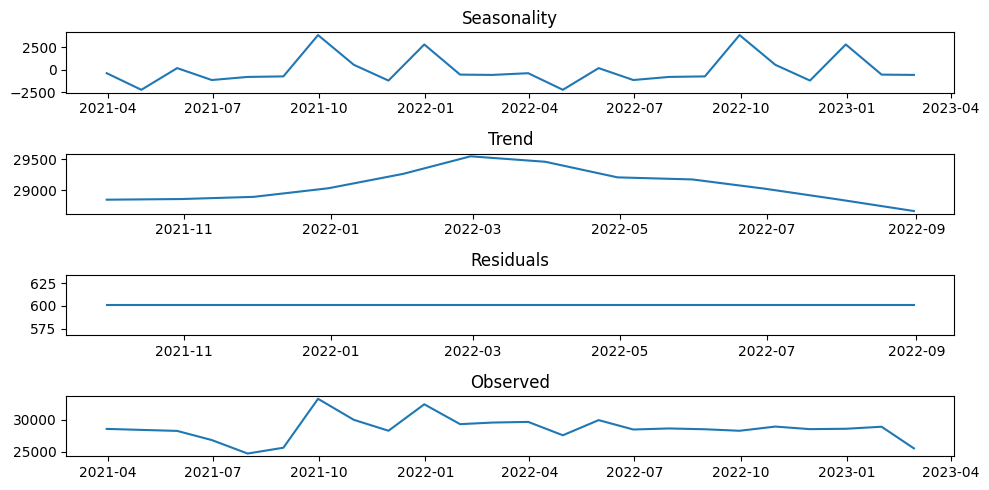

In [39]:
# Importation du module nécessaire
from statsmodels.tsa.seasonal import seasonal_decompose

# Verification : 'transaction_date' est de type datetime
ventes['transaction_date'] = pd.to_datetime(ventes['transaction_date'])

# Agréger les données par mois
monthly_data = ventes.groupby(pd.Grouper(key='transaction_date', freq='M')).size()

# Effectuer la décomposition de série temporelle
decomposition = seasonal_decompose(monthly_data, model='additive')

# Créer une visualisation
plt.figure(figsize=(10, 5))

# Saisonnalité
plt.subplot(411)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonality')

# Tendance
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')

# Résidus
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residuals')

# Série temporelle observée
plt.subplot(414)
plt.plot(monthly_data, label='Observed')
plt.title('Observed')

# Résultats
plt.tight_layout()
plt.show()


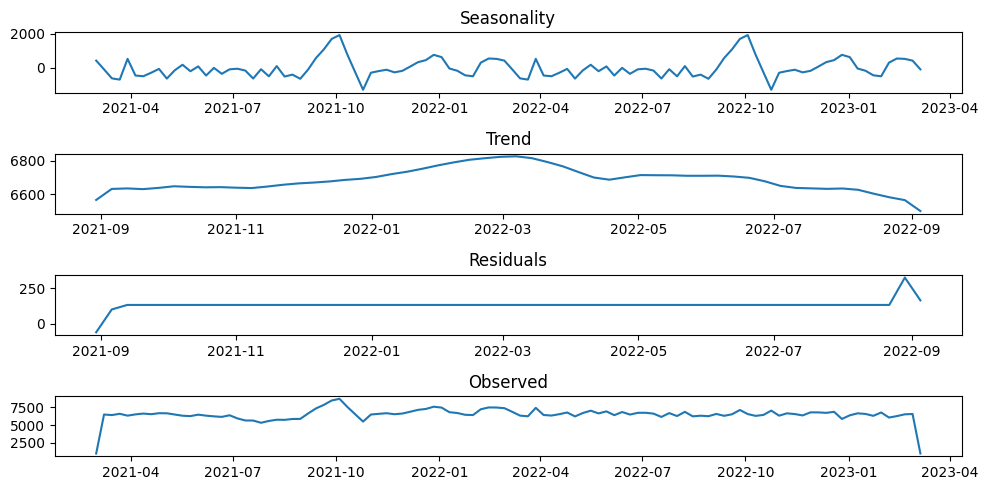

In [40]:
# Importation du module nécessaire

from statsmodels.tsa.seasonal import seasonal_decompose

# Verification : 'transaction_date' est de type datetime
ventes['transaction_date'] = pd.to_datetime(ventes['transaction_date'])

# Agréger les données par semaine dans chaque mois
weekly_data = ventes.groupby([pd.Grouper(key='transaction_date', freq='W-MON')]).size()

# Effectuer la décomposition de série temporelle
decomposition = seasonal_decompose(weekly_data, model='additive')

# Créer une visualisation
plt.figure(figsize=(10, 5))

# Saisonnalité
plt.subplot(411)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonality')

# Tendance
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')

# Résidus
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residuals')

# Série temporelle observée
plt.subplot(414)
plt.plot(weekly_data, label='Observed')
plt.title('Observed')

# Résultats
plt.tight_layout()
plt.show()

## Analyse clients

In [41]:
## Nombre de client Annuel

# Calcul du nombre de client unique par année
clients_par_année = ventes.groupby('année')['client_id'].nunique().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(clients_par_année, x='année', y='client_id', title='Évolution du nombre de clients par année')

# Gestion des titres
fig.update_xaxes(title='Année') # # Titres des abscisses
fig.update_yaxes(title='Nombre de clients uniques') # Titres des ordonnées
fig.update_xaxes(tickvals=clients_par_année['année'])

# Affichage du graphique
fig.show()

In [42]:
## Nombre de client Mensuel

# Compter le nombre de clients unique par mois
clients_par_année = ventes.groupby('mois_complet')['client_id'].nunique().reset_index()

## LineCharts interactifs

# Préparation des données pour le graphique
fig = px.line(clients_par_année, x='mois_complet', y='client_id', title='Évolution du nombre de clients par mois')

# Gestion des titres
fig.update_xaxes(title='Mois') # # Titres des abscisses
fig.update_yaxes(title='Nombre de clients uniques') # Titres des ordonnées

# Affichage du graphique
fig.show()

In [43]:
## Top 10 client

# Calcul du top 10 clients
top_clients = ventes.groupby('client_id')['price'].sum().nlargest(10).reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(top_clients, x='client_id', y='price', title="Top 10 des clients par chiffre d'affaire")

# Gestion des titres
fig.update_xaxes(title='Identifiant client') # # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaires") # Titres des ordonnées

# Affichage du graphique
fig.show()

Au vue de l'écart de chiffre d'affaires réalisé, 4 clients semblent être des professionnels ( BtoB customers ) :

- C_1609
- C_4958
- C_6714
- C_3454

Nous conservons cette information pour la suite de notre analyse.

In [44]:
# Création de la liste des clients BtoB
btob = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

In [45]:
## Top 10 client ( sans les clients BtoB )

# Calcul du chiffre d'affaire par client
somme_prix_par_client = ventes.groupby('client_id')['price'].sum().reset_index()

# Mise à l'écart des clients BtoB
client_id_top4 = somme_prix_par_client.nlargest(4, 'price').index
somme_prix_par_client_sans_top4 = somme_prix_par_client[~somme_prix_par_client.index.isin(client_id_top4)]

# Calcul du Top 10 clients
clients_top10_sans_top4 = somme_prix_par_client_sans_top4.nlargest(10, 'price')

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(clients_top10_sans_top4, x='client_id', y='price', title="Top 10 des clients par chiffre d'affaire")

# Gestion des titres
fig.update_xaxes(title='Identifiant client') # # Titres des abscisses
fig.update_yaxes(title="Chiffre d'affaires") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [46]:
## Répartation des clients par genre

# Calcul du nombre de clients par genre
repartition_genre = ventes['gender'].value_counts().reset_index()
repartition_genre.columns = ['gender', 'count']

## Piecharts interactifs

# Préparation des données pour le graphique
fig = px.pie(repartition_genre, names='gender', values='count', title='Répartition des clients par genre')

# Affichage du graphique
fig.show()

In [47]:
## Distribution de l'âge des clients par genre

# Création des sous-ensembles de données par genre
clients_homme = ventes[ventes['gender'] == 'm']
clients_femme = ventes[ventes['gender'] == 'f']

# Création des DataFrames pour Plotly
df_homme = pd.DataFrame(clients_homme['age'])
df_homme['gender'] = 'Homme'
df_femme = pd.DataFrame(clients_femme['age'])
df_femme['gender'] = 'Femme'

# Concatenation des DataFrames
df = pd.concat([df_homme, df_femme])

# Création du graphique interactif
fig = px.histogram(df, x='age', color='gender', barmode='overlay',
                   title="Distribution de l'âge des clients par genre",
                   labels={'age': "Âge", 'count': "Nombre de clients"})

# Affichage du graphique
fig.show()

## Analyse des références produits

In [48]:
## Top 10 des références produits en terme de ventes

# Calcul du top 10 des références produits en terme de ventes
top_ventes = ventes['product_id'].value_counts().head(10).reset_index()
top_ventes.columns = ['product_id', 'count']


## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(top_ventes, x='product_id', y='count', title="Top 10 des produits en terme de vente")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [49]:
## Top 10 des références produits en terme de ventes ( Catégorie 0 )

# Sélection des références produits de catégorie 0
ventes_categ_0 = ventes[ventes['category'] == 0]

# Calcul du top 10 des références produits en terme de ventes  pour la catégorie 0
top_ventes_categ_0 = ventes_categ_0['product_id'].value_counts().head(10).reset_index()
top_ventes_categ_0.columns = ['product_id', 'count']

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(top_ventes_categ_0, x='product_id', y='count', title="Top 10 des produits en terme de vente - cat0")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [50]:
## Top 10 des références produits en terme de ventes ( Catégorie 1 )

# Sélection des références produits de catégorie 1
ventes_categ_1 = ventes[ventes['category'] == 1]

# Calcul du top 10 des références produits en terme de ventes  pour la catégorie 1
top_ventes_categ_1 = ventes_categ_1['product_id'].value_counts().head(10).reset_index()
top_ventes_categ_1.columns = ['product_id', 'count']

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(top_ventes_categ_1, x='product_id', y='count', title="Top 10 des produits en terme de vente - cat1")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [51]:
## Top 10 des références produits en terme de ventes ( Catégorie 2 )

# Sélection des références produits de catégorie 2
ventes_categ_2 = ventes[ventes['category'] == 2]

# Calcul du top 10 des références produits en terme de ventes  pour la catégorie 2
top_ventes_categ_2 = ventes_categ_2['product_id'].value_counts().head(10).reset_index()
top_ventes_categ_2.columns = ['product_id', 'count']

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(top_ventes_categ_2, x='product_id', y='count', title="Top 10 des produits en terme de vente - cat2")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [52]:
## Flop 10 des références produits en terme de ventes

# Calcul du flop 10 des références produits en terme de ventes
bottom_ventes = ventes['product_id'].value_counts().tail(10).reset_index()
bottom_ventes.columns = ['product_id', 'count']


## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(bottom_ventes, x='product_id', y='count', title="Flop 10 des produits en terme de vente")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

Il semblerait que de nombreux produits aient été acheté une seule fois seulement.  

In [53]:
## Liste des produits accusant une seule vente sur la période

# Calcul du nombre de ventes par produit
ventes_par_produit = ventes.groupby('product_id').size().reset_index(name='count')

# Sélection des références produits enregistrant une seule vente
produits_une_vente = ventes_par_produit[ventes_par_produit['count'] == 1]['product_id']

# Aperçu du résultat
df_vente_une_vente = ventes[ventes['product_id'].isin(produits_une_vente)]
df_vente_une_vente[['product_id','category','price']]

product_id category   price
680869     0_1498        0    2.48
685381     0_2201        0   20.99
686585     0_1683        0    2.99
686765      0_541        0    1.99
686892     0_1151        0    2.99
686932     0_1601        0    1.99
687032     0_1539        0    0.99
687070       2_98        2  149.74
687099     0_1284        0    1.38
687148     0_1728        0    2.27
687209      0_833        0    2.99
687290       2_23        2  115.99
687378      0_886        0   21.82
687506      0_549        0    2.99
687523     0_1379        0    2.99
687528     0_1633        0   24.99
687529       2_81        2   86.99
687530      0_807        0    1.99

In [54]:
## Flop 10 des références produits en terme de ventes ( Catégorie 0 )

# Sélection des références produits de catégorie 0
ventes_categ_0 = ventes[ventes['category'] == 0]

# Calcul du flop 10 des références produits en terme de ventes pour la catégorie 0
bottom_ventes_categ_0 = ventes_categ_0['product_id'].value_counts().tail(10).reset_index()
bottom_ventes_categ_0.columns = ['product_id', 'count']

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(bottom_ventes_categ_0, x='product_id', y='count', title="Flop 10 des produits en terme de vente - cat0")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [55]:
## Flop 10 des références produits en terme de ventes ( Catégorie 1 )

# Sélection des références produits de catégorie 1
ventes_categ_1 = ventes[ventes['category'] == 1]

# Calcul du flop 10 des références produits en terme de ventes pour la catégorie 1
bottom_ventes_categ_1 = ventes_categ_1['product_id'].value_counts().tail(10).reset_index()
bottom_ventes_categ_1.columns = ['product_id', 'count']

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(bottom_ventes_categ_1, x='product_id', y='count', title="Flop 10 des produits en terme de vente - cat1")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [56]:
## Flop 10 des références produits en terme de ventes ( Catégorie 2 )

# Sélection des références produits de catégorie 2
ventes_categ_2 = ventes[ventes['category'] == 2]

# Calcul du flop 10 des références produits en terme de ventes pour la catégorie 2
bottom_ventes_categ_2 = ventes_categ_2['product_id'].value_counts().tail(10).reset_index()
bottom_ventes_categ_2.columns = ['product_id', 'count']

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(bottom_ventes_categ_2, x='product_id', y='count', title="Flop 10 des produits en terme de vente - cat2")

# Gestion des titres
fig.update_xaxes(title='Identifiant produit') # # Titres des abscisses
fig.update_yaxes(title="Nombre de ventes") # Titres des ordonnées

# Affichage du graphique
fig.show()

In [57]:
## Répartition des références produits par catégorie

# Calcul du nombre de références par catégorie
df_grouped = ventes.groupby('category').size().reset_index(name='count')

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(df_grouped, x='category', y='count', title="Répartition des références par catégorie")

# Gestion des titres
fig.update_xaxes(title='Catégorie') # # Titres des abscisses
fig.update_yaxes(title="Nombre de référence") # Titres des ordonnées

# Affichage du graphique
fig.show()

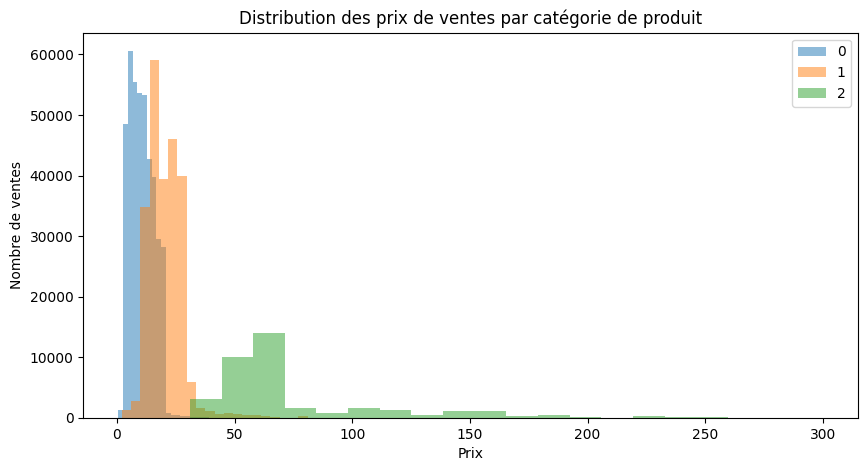

In [58]:
## Distribution des prix de ventes par catégorie de produits

# Création d'un sous-ensemble de données pour chaque catégorie
categories = ventes['category'].unique()

# Création d'un histogramme pour chaque catégorie
plt.figure(figsize=(10, 5))
for category in categories:
    plt.hist(ventes[ventes['category'] == category]['price'], bins=20, alpha=0.5, label=category)
plt.title("Distribution des prix de ventes par catégorie de produit")
plt.xlabel("Prix")
plt.ylabel("Nombre de ventes")
plt.legend()
plt.show()

In [59]:
## Prix moyen par catégorie de produit

# Calcul du prix moyen par catégorie
prix_moyen_par_categorie = ventes.groupby('category')['price'].mean().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(prix_moyen_par_categorie, x='category', y='price', title="Prix moyen par catégorie")

# Gestion des titres
fig.update_xaxes(title='Catégorie') # # Titres des abscisses
fig.update_yaxes(title="Prix moyen") # Titres des ordonnées
fig.update_xaxes(tickvals=[0, 1, 2], ticktext=['0', '1', '2'])

# Affichage du graphique
fig.show()

## Analyse clients BtoB

In [60]:
## Evolution du montant total d'achat - Clients BtoB

# Sélection des données relatives aux clients BtoB
ventes_btob = ventes[ventes['client_id'].isin(btob)]

# Calcul de l'évolution du montant total des achats par client BtoB
montant_achats = ventes_btob.groupby(['client_id', pd.Grouper(key='transaction_date', freq='M')])['price'].sum().reset_index()

# Préparation du graphique interactif
fig = px.line(montant_achats, x='transaction_date', y='price', color='client_id', title="Évolution du montant des achats réalisés par les clients BtoB")

# Gestion des titres
fig.update_xaxes(title='Date')  # Titres des abscisses
fig.update_yaxes(title="Montant des achats")  # Titres des ordonnées

# Affichage du graphique
fig.show()

In [61]:
# Liste des client BtoB
bToblist = ventes.groupby('client_id')['price'].sum().nlargest(4).reset_index(name='chiffre_affaire')
bToblist

client_id  chiffre_affaire
0    c_1609        326039.89
1    c_4958        290227.03
2    c_6714        153918.60
3    c_3454        114110.57

In [62]:
## Chiffre d'affaire

# Calcul du chiffre d'affaires total
ca_total = ventes['price'].sum()

# Calcul de la somme du chiffre d'affaires des quatre principaux clients BtoB
ca_quatre_principaux = bToblist['chiffre_affaire'].sum()

# Calcul de la part du chiffre d'affaires des quatre principaux clients BtoB par rapport au chiffre d'affaires total en pourcentage
pourcentage_ca_quatre_principaux = (ca_quatre_principaux / ca_total) * 100

# Calcul de la part du chiffre d'affaires restant (autres clients)
pourcentage_ca_autres = 100 - pourcentage_ca_quatre_principaux

# Résultat
print("Chiffre d'affaires des quatre principaux clients BtoB :", round(ca_quatre_principaux,2), "€")
print("Part des quatre principaux clients BtoB dans le chiffre d'affaires total :", round(pourcentage_ca_quatre_principaux,2), "%")
print("")

## Piecharts interactifs

# Préparation des données pour le graphique
labels = ['Clients BtoB', 'Autres clients']
sizes = [pourcentage_ca_quatre_principaux, pourcentage_ca_autres]
data = {'labels': labels,'sizes': sizes}

# Affichage du graphique
fig = px.pie(data, values='sizes', names='labels', title='Part du chiffre d\'affaires des quatre principaux clients BtoB par rapport au chiffre d\'affaires total')
fig.show()


Chiffre d'affaires des quatre principaux clients BtoB : 884296.09 €
Part des quatre principaux clients BtoB dans le chiffre d'affaires total : 7.35 %



In [63]:
## Pourcentage du chiffre d'affaire total réalisé par client BtoB

# Calcul du pourcentage du chiffre d'affaires total par client
ca_total = bToblist['chiffre_affaire'].sum()
bToblist['pourcentage_ca'] = round((bToblist['chiffre_affaire'] / ca_total) * 100, 2)
bToblist = bToblist.sort_values(by='pourcentage_ca', ascending=False)

# Préparation des données pour le graphique
fig = px.bar(bToblist, x='client_id', y='pourcentage_ca',
             color='client_id',
             labels={'client_id': 'Clients', 'pourcentage_ca': "Pourcentage du chiffre d'affaires"},
             title="Pourcentage du chiffre d'affaires des quatre principaux clients BtoB",
             text='pourcentage_ca')

# Affichage du graphique
fig.show()

In [64]:
## Répartition du chiffre d'affaire entre les clients BtoB

## Piecharts interactifs

# Préparation des données pour le graphique
df = pd.DataFrame(bToblist)

# Affichage du graphique
fig = px.pie(df, values='chiffre_affaire', names='client_id',
             title='Répartition du chiffre d\'affaires pour les clients BtoB',
             hover_data=['client_id', 'chiffre_affaire'],
             labels={'client_id': 'Client ID', 'chiffre_affaire': 'Chiffre d\'affaires'})
fig.show()

In [65]:
## Courbe de Lorenz
import plotly.graph_objects as go

# Calcul du chiffre d'affaires total par client
chiffre_affaire_par_client = ventes.groupby('client_id')['price'].sum().reset_index()
chiffre_affaire_par_client = chiffre_affaire_par_client.rename(columns={'price': 'chiffre_affaire'})
chiffre_affaire_par_client.sort_values(by='chiffre_affaire')

# Courbe de Lorenz
dep = chiffre_affaire_par_client["chiffre_affaire"].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)

# Création du graphique avec Plotly Express
fig = px.line(x=np.linspace(0-1/n, 1+1/n, n+1), y=lorenz, title="Courbe de Lorenz du chiffre d'affaires par client")
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='red', dash='solid'), name='Ligne d\'égalité parfaite'))

# Affichage du graphique
fig.show()

La courbe de Lorenz nous apprends que 80% du chiffres d'affaires est réalisé par 50% des clients.

In [66]:
#Indice de gini
n = len(lorenz)
AUC = (lorenz.sum()-lorenz[-1])/n

# S est la surface entre la première bissectrice et le courbe de Lorenz
S = 0.5 - AUC

# Définition de l'indicateur de Gini
gini = (2*S).round(3)
print(f"L'indice de Gini est égal à {gini}")

L'indice de Gini est égal à 0.442


L'indice de Gini nous indique une distribution relativement équilibrée.

# Etudes des corrélations

## Lien entre le genre du client et la catégorie de livre achetée

In [67]:
# Calcul du nombre de transactions pour chaque combinaison de genre et categorie
nombre_par_categorie = ventes.groupby(['gender', 'category']).size().unstack(fill_value=0).reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(nombre_par_categorie, x='gender', y=nombre_par_categorie.columns[1:], title='Lien entre le genre du client et catégorie de livre achetée')

# Gestion des titres
fig.update_xaxes(title='Genre du client') # # Titres des abscisses
fig.update_yaxes(title='Nombre de transactions') # Titres des ordonnées
fig.update_xaxes(tickvals=[0, 1], ticktext=['Femme', 'Homme'])

# Affichage du graphique
fig.update_layout(barmode='group')
fig.show()

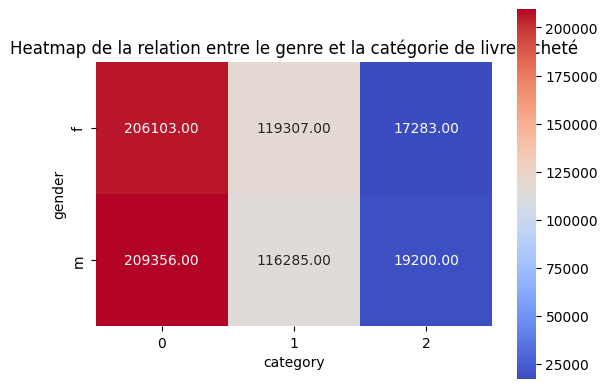

In [68]:
# Affichage des valeurs uniques
# print(ventes['gender'].unique())
# print(ventes['category'].unique())

## Heatmap

# Mise en place d'une matrice de corrélation
X = "gender"
Y = "category"
contingency_table = ventes[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")

# Suppression des variables "Total"
contingency_table = contingency_table.drop("Total", axis=0)
contingency_table = contingency_table.drop("Total", axis=1)

# Préparation des données pour le graphique
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Gestion du titre
plt.title("Heatmap de la relation entre le genre et la catégorie de livre acheté")

# Affichage du graphique
plt.show()

Nous cherchons à définir si il existe une corrélation entre deux variables catégorielles. Nous allons donc utiliser le test de Chi2.

Hypothèse nulle (H0) :
Il n'y a pas de relation entre le genre du client et la catégorie de livre achetée. En d'autres termes, les variables sont indépendantes.

Hypothèse alternative (H1) :
Il existe une relation entre le genre du client et la catégorie de livre achetée. En d'autres termes, les variables ne sont pas indépendantes.

In [69]:
# Hypothèses nulle (H0) : Pas de relation entre les variables
# Hypothèses alternative (H1) : Il existe une relation entre les variables

# Création d'une table de contingence
contingency_table = ventes.pivot_table(index='gender', columns='category', aggfunc='size', fill_value=0)

# Test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification

# Convertir la valeur de p en notation décimale normale
p_normal = format(p, '.40f')

print("Chi2 statistique :", chi2)
print("Valeur de p :", p_normal)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)
print("")


Chi2 statistique : 158.25417617304882
Valeur de p : 0.0000000000000000000000000000000000432058
Degrés de liberté : 2
Fréquences attendues : [[207080.50959953 117427.98066132  18184.50973915]
 [208378.49040047 118164.01933868  18298.49026085]]



Une valeur de p faible et inférieur au seuil de significativité (typiquement < 0.05) indique que les résultats sont statistiquement significatifs et que l'hypothèse nulle peut être rejetée.

Les variables ne sont donc pas indépendantes.

In [70]:
# Calcul de Cramer's V
n = contingency_table.sum().sum()  # Taille totale de l'échantillon
k = min(contingency_table.shape) - 1  # Nombre de catégories - 1 (en cas de table carrée)
V = np.sqrt(chi2 / (n * k))

# Interprétation de Cramer's V
print("Cramer's V :", V)
print("Mesure de l'association : ")
if V <= 0.1:
    print("Faible association")
elif V <= 0.3:
    print("Association modérée")
elif V <= 0.5:
    print("Association relativement forte")
else:
    print("Association forte")

Cramer's V : 0.015171569112675852
Mesure de l'association : 
Faible association


## Lien entre l'âge du client et le montant total des achats

In [71]:
# Calcul du montant total des achats par âge
total_sales_by_age = ventes.groupby('age')['price'].sum().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(total_sales_by_age, x='age', y='price', title='Relation entre l\'âge du client et le montant total des ventes')

# Gestion des titres
fig.update_xaxes(title='Âge du client') # # Titres des abscisses
fig.update_yaxes(title='Montant total des ventes') # Titres des ordonnées

# Affichage du graphique
fig.update_layout(barmode='group')
fig.show()

In [72]:
## Scatterplot

# Préparation des données pour le graphique
fig = px.scatter(ventes, x='age', y='price',
                 title='Relation entre l\'âge du client et le montant total des achats',
                 labels={'age': 'Âge du client', 'price': 'Montant total des ventes'})

# Personnalisation supplémentaire
fig.update_traces(marker=dict(color='skyblue', opacity=0.5))  # Couleur et transparence
fig.update_layout(showlegend=False, width=800, height=400,  # Options de mise en page
                  xaxis=dict(gridcolor='lightgrey'), yaxis=dict(gridcolor='lightgrey'))

# Affichage du graphique interactif
fig.show()

Nous cherchons à définir si il existe une corrélation entre deux variables quantitatives. Nous allons donc utiliser le test de corrélation de Pearson.

Hypothèse nulle (H0) : Il n'y a pas de relation entre l'âge du client et le montant total d'achat. En d'autres termes, les variables sont indépendantes.

Hypothèse alternative (H1) : Il existe une relation entre l'âge du client et le montant total d'achat. En d'autres termes, les variables ne sont pas indépendantes.

In [73]:
# Affichage des valeurs uniques
print(ventes['age'].unique())
print('')
print(ventes['price'].unique())

# Calculer le coefficient de corrélation de Pearson et la p-valeur
correlation_coefficient, p_value = stats.pearsonr(ventes['age'], ventes['price'])

print("Coefficient de corrélation de Pearson :", correlation_coefficient)
print("P-valeur :", p_value)

[57 44 55 52 41 39 45 56 59 43 54 33 36 37 62 34 42 60 46 49 50 65 35 48
 58 75 38 51 70 40 47 73 20 53 61 89 64 28 68 29 26 76 23 22 25 69 84 78
 66 87 71 21 77 80 63 74 82 83 67 30 31 85 27 79 88 86 91 93 72 32 90 24
 92 94 81 95]

[ 11.99  23.37   3.73 ... 233.54  27.85  35.24]
Coefficient de corrélation de Pearson : -0.2074960877881339
P-valeur : 0.0


La valeur du coefficient est proche de zéro, ce qui indique une faible corrélation linéaire entre les deux variables.

La p-valeur associée au test est inférieure à 0.05, par conséquent, nous rejetons l'hypothèse nulle et concluons que les deux variables ne sont pas indépendantes.

En conclusion, ces résultats suggèrent qu'il existe une faible corrélation inverse entre l'âge du client et le montant total d'achat.

Pour aller plus loin dans l'analyse, nous allons tenter de regrouper les clients par groupe d'âges.


In [74]:
# Calcul de la moyenne par âge
moyenne_par_age = ventes.groupby('age')['price'].mean().reset_index()

## Scatterplot

# Préparation des données pour le graphique
fig = px.scatter(moyenne_par_age, x='age', y='price',
                 title='Relation entre l\'âge du client et le montant moyen des achats',
                 labels={'age': 'Âge du client', 'price': 'Montant total des ventes'})

# Personnalisation supplémentaire
fig.update_traces(marker=dict(color='skyblue', opacity=0.5))  # Couleur et transparence
fig.update_layout(showlegend=False, width=800, height=400,  # Options de mise en page
                  xaxis=dict(gridcolor='lightgrey'), yaxis=dict(gridcolor='lightgrey'))

# Affichage du graphique interactif
fig.show()

In [75]:
# Calcul du montant d'achat par âge
montant_par_age = ventes.groupby('age')['price'].sum().reset_index()

# Création des catégories d'âge
bins = [0, 18, 35, 60, 100]
labels = ['0-17', '18-34', '35-59', '60+']
montant_par_age['age_category'] = pd.cut(montant_par_age['age'], bins=bins, labels=labels)

# Calcul du montant d'achat par catégorie d'âge
montant_par_age = montant_par_age.groupby('age_category')['price'].sum().reset_index()

## Barcharts interactifs

# Préparation des données pour le graphique
fig = px.bar(montant_par_age, x='age_category', y='price', title='Relation entre la catégorie d\'âge et le montant des achats')

# Gestion des titres
fig.update_xaxes(title='Catégorie d\'âge') # # Titres des abscisses
fig.update_yaxes(title='Montant total des ventes') # Titres des ordonnées

# Affichage du graphique
fig.update_layout(barmode='group')
fig.show()

Nous sommes désormais en présence d'une variable quantitative ( montant d'achat ) et une variable catégorielle ( tranche d'âge ).

Nous allons donc tenter d'effectuer un test Anova, seulement si la distribution est normale.

Hypothèse nulle (H0) : Les données sont tirées d'une distribution normale.

Hypothèse alternative (H1) : Les données ne sont pas tirées d'une distribution normale.

In [76]:
# Extractin des montants d'achat par catégorie d'âge
montants = montant_par_age['price']

# Test de normalité Shapiro-Wilk
stat, p_value = shapiro(montants)

# Afficher le résultat du test
print("Statistique de test :", stat)
print("P-value :", p_value)

# Interprétation du test
alpha = 0.05
if p_value > alpha:
    print("")
    print("Les données semblent être normalement distribuées (ne pas rejeter l'hypothèse nulle)")
else:
    print("")
    print("Les données ne semblent pas être normalement distribuées (rejeter l'hypothèse nulle)")

Statistique de test : 0.9805469512939453
P-value : 0.9052199721336365

Les données semblent être normalement distribuées (ne pas rejeter l'hypothèse nulle)


H0 (Hypothèse nulle) : Il n'y a pas de différence significative entre les montants d'achat des différentes catégories d'âge.

H1 (Hypothèse alternative) : Il y a une différence significative entre les montants d'achat des différentes catégories d'âge.

In [77]:
# Mise en place des catégorie
montant_18_34 = ventes[(ventes['age'] > 17) & (ventes['age'] <= 34)]['price']
montant_35_59 = ventes[(ventes['age'] > 34) & (ventes['age'] <= 59)]['price']
montant_60_plus = ventes[ventes['age'] >= 60]['price']

# Test Anova
statistic, p_value = f_oneway(montant_18_34, montant_35_59, montant_60_plus)

alpha = 0.05
if p_value < alpha:
    print("La valeur p est", p_value, "donc nous rejetons l'hypothèse nulle. Il y a une différence significative entre les groupes.")
else:
    print("La valeur p est", p_value, "donc nous ne pouvons pas rejeter l'hypothèse nulle. Il n'y a pas suffisamment de preuves pour affirmer qu'il y a une différence significative entre les groupes.")

La valeur p est 0.0 donc nous rejetons l'hypothèse nulle. Il y a une différence significative entre les groupes.


## Lien entre l'âge du client et la fréquence d'achat

In [78]:
# Calcul de la fréquence d'achat par client
frequency = ventes.groupby('client_id').size().reset_index(name='frequency')

# Ajout de la colonne 'age'
result = pd.merge(frequency, ventes[['client_id', 'age']].drop_duplicates(), on='client_id')

# Exclure les clients BtoB
clients_b2b = ventes[ventes['client_id'].isin(bToblist['client_id'])]['client_id']
result = result[~result['client_id'].isin(clients_b2b)]

# Trier le DataFrame par ordre décroissant de fréquence
result_sorted = result.sort_values(by='frequency', ascending=False)

## Scatterplot

# Préparation des données pour le graphique
fig = px.scatter(result, x='age', y='frequency',
                 title="Fréquence d\'achat en fonction de l'âge des clients",
                 labels={'age': 'Âge du client', 'frequency': "Fréquence d'achat"})

# Personnalisation supplémentaire
fig.update_traces(marker=dict(color='skyblue', opacity=0.5))  # Couleur et transparence
fig.update_layout(showlegend=False, width=800, height=400,  # Options de mise en page
                  xaxis=dict(gridcolor='lightgrey'), yaxis=dict(gridcolor='lightgrey'))

# Affichage du graphique interactif
fig.show()

Nous cherchons à définir si il existe une corrélation entre deux variables quantitatives. Nous allons donc utiliser le test de corrélation de Pearson.

Hypothèse nulle (H0) : Il n'y a pas de relation entre l'âge du client et la fréquence d'achat. En d'autres termes, les variables sont indépendantes.

Hypothèse alternative (H1) : Il existe une relation entre l'âge du client et la fréquence d'achat. En d'autres termes, les variables ne sont pas indépendantes.

In [79]:
# Affichage des valeurs uniques
# print(result_sorted['age'].unique())
# print(result_sorted['frequency'].unique())

# Calcul du coefficient de corrélation de Pearson et de la p-valeur
correlation_coefficient, p_value = stats.pearsonr(result_sorted['age'], result_sorted['frequency'])

print("Coefficient de corrélation de Pearson :", correlation_coefficient)
print("P-valeur :", p_value)

Coefficient de corrélation de Pearson : 0.03032790187032987
P-valeur : 0.004922261715831482


Le coefficient de corrélation de Pearson est de 0.0303. Cette valeur indique une corrélation très faible entre l'âge du client et la fréquence d'achat. En d'autres termes, il y a une tendance très légère à la corrélation positive entre ces deux variables, mais elle est très faible.


La p-valeur associée au test est de 0.0049. Cette p-valeur est inférieure au niveau de signification typique de 0.05, ce qui suggère qu'il y a suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle il n'y a pas de relation entre l'âge du client et la fréquence d'achat.

En tenant compte du coefficient de corrélation de Pearson
et de la p-valeur, nous pouvons conclure qu'il existe une corrélation statistiquement significative entre l'âge du client et la fréquence d'achat. Cependant, la force de cette corrélation est très faible, ce qui signifie que l'âge du client n'a qu'une influence marginale sur la fréquence d'achat.

Pour aller plus loin dans l'analyse, nous tentons de faire le test en regroupant les clients par tranche d'âge.


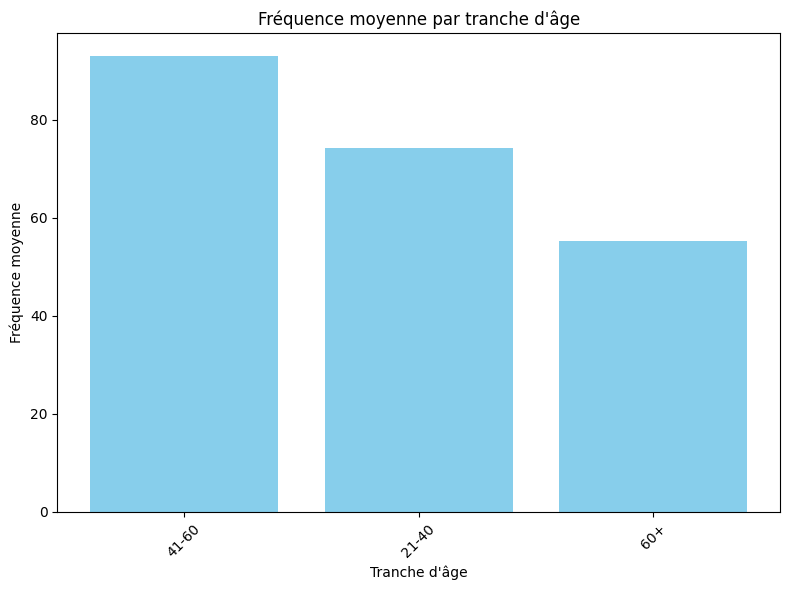

In [80]:
# Définir les limites des tranches d'âge
age_bins = [21, 41, 60, float('inf')]
age_labels = ['21-40', '41-60', '60+']

# Ajouter une colonne 'tranche_age' basée sur les catégories d'âge
result['tranche_age'] = pd.cut(result['age'], bins=age_bins, labels=age_labels)

# Calcul de la fréquence moyenne par tranche d'âge
mean_frequency_by_age_group = result.groupby('tranche_age')['frequency'].mean().reset_index(name='mean_frequency')

# Trier le DataFrame par ordre décroissant de fréquence moyenne
result_sorted_by_age_group = mean_frequency_by_age_group.sort_values(by='mean_frequency', ascending=False)

# Filtrer les données pour obtenir les clients de moins de 20 ans
clients_moins_de_20_ans = ventes[ventes['age'] < 20]

# Afficher la liste des clients en dessous de 20 ans
# print(clients_moins_de_20_ans[['client_id', 'age']])

# Extraction des données pour le graphique
ages = result_sorted_by_age_group['tranche_age']
frequencies = result_sorted_by_age_group['mean_frequency']

# Création du graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(ages, frequencies, color='skyblue')

# Ajout de titres et d'étiquettes
plt.title('Fréquence moyenne par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Fréquence moyenne')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

# Affichage du graphique
plt.tight_layout()
plt.show()

Nous sommes désormais en présence d'une variable quantitative ( fréquence d'achat ) et une variable catégorielle ( tranche d'âge ).

Nous allons donc tenter d'effectuer un test Anova, seulement si la distribution est normale.

Hypothèse nulle (H0) : Les données sont tirées d'une distribution normale.

Hypothèse alternative (H1) : Les données ne sont pas tirées d'une distribution normale.

In [81]:
# Test de Shapiro-Wilk
data = result_sorted_by_age_group['mean_frequency']

# Effectuer le test de Shapiro-Wilk
statistic, p_value = shapiro(data)

# Interpréter le résultat
alpha = 0.05
print("Statistique de test :", statistic)
print("p-value :", p_value)
print("")
if p_value > alpha:
    print("Les données suivent une distribution normale (H0 ne peut pas être rejetée)")
else:
    print("Les données ne suivent pas une distribution normale (H0 est rejetée)")


Statistique de test : 0.9999858140945435
p-value : 0.9928066542534928

Les données suivent une distribution normale (H0 ne peut pas être rejetée)


H0 : Il n'y a pas de corrélation entre l'âge du client et la fréquence d'achat.

H1 : Il existe une corrélation entre l'âge du client et la fréquence d'achat.

In [82]:
# Séparation des fréquences par tranche d'âge
freq_21_40 = result[result['tranche_age'] == '21-40']['frequency']
freq_41_60 = result[result['tranche_age'] == '41-60']['frequency']
freq_61_plus = result[result['tranche_age'] == '60+']['frequency']

# Test ANOVA uniquement si toutes les tranches d'âge contiennent des données valides
if len(freq_21_40) > 0 and len(freq_41_60) > 0 and len(freq_61_plus) > 0:
    # Effectuer le test ANOVA
    statistic, p_value = f_oneway(freq_21_40, freq_41_60, freq_61_plus)

    # Interpréter le résultat
    alpha = 0.05
    print("Statistique de test ANOVA :", statistic)
    print("p-value ANOVA :", p_value)
    print("")
    if p_value > alpha:
        print("Il n'y a pas de différence significative entre les moyennes des fréquences des différentes tranches d'âge (H0 ne peut pas être rejetée)")
    else:
        print("Il existe une différence significative entre les moyennes des fréquences des différentes tranches d'âge (H0 est rejetée)")
else:
    print("Les données ne sont pas disponibles pour toutes les tranches d'âge, impossible d'effectuer le test ANOVA.")


Statistique de test ANOVA : 179.40560510572075
p-value ANOVA : 6.020315715937733e-77

Il existe une différence significative entre les moyennes des fréquences des différentes tranches d'âge (H0 est rejetée)


## Lien entre l'âge du client et la taille du panier

In [83]:
# Calcul du nombre d'articles par session
nombre_articles_par_session = ventes.groupby('session_id')['product_id'].count()

# Ajouter l'âge de chaque session
nombre_articles_par_session = nombre_articles_par_session.reset_index().merge(ventes[['session_id', 'age']], on='session_id')

# Calcul du nombre moyen d'articles par session pour chaque groupe d'âge
nombre_moyen_articles_par_age = nombre_articles_par_session.groupby('age')['product_id'].mean()


## Scatterplot

# Préparation des données pour le graphique
fig = px.scatter(nombre_moyen_articles_par_age, x=nombre_moyen_articles_par_age.index, y=nombre_moyen_articles_par_age.values,
                 title="Relation entre l\'âge et le nombre moyen d\'articles par session")

# Personnalisation supplémentaire
fig.update_traces(marker=dict(color='skyblue', opacity=0.5))  # Couleur et transparence
fig.update_layout(showlegend=False, width=800, height=400,  # Options de mise en page
                  xaxis=dict(gridcolor='lightgrey'), yaxis=dict(gridcolor='lightgrey'), yaxis_title="Nombre moyen d'articles par session")

# Affichage du graphique interactif
fig.show()

Nous cherchons à définir si il existe une corrélation entre deux variables quantitatives.

Nous allons donc utiliser le test de corrélation de Pearson.

Hypothèse nulle (H0) : Il n'y a pas de relation entre l'âge du client et la taille du panier. En d'autres termes, les variables sont indépendantes.

Hypothèse alternative (H1) : Il existe une relation entre l'âge du client et la taille du panier. En d'autres termes, les variables ne sont pas indépendantes.

In [84]:
# Calcul de la corrélation de Pearson
correlation, p_value = stats.pearsonr(nombre_moyen_articles_par_age.index, nombre_moyen_articles_par_age.values)
print("Corrélation de Pearson:", correlation)
print("Valeur de p:", "{:.10f}".format(p_value))

Corrélation de Pearson: -0.6188994064071222
Valeur de p: 0.0000000025


Le coefficient de corrélation de Pearson indique une corrélation négative modérée entre l'âge et le nombre moyen d'articles par session.

La p-value associée est extrêmement faible (proche de zéro), ce qui signifie que la corrélation observée est statistiquement significative. En d'autres termes, il est très peu probable d'observer une telle corrélation juste par hasard dans un échantillon de cette taille. Cela renforce la confiance dans le fait que la corrélation observée est réelle.

En conclusion, il semble y avoir une corrélation négative significative entre l'âge et le nombre moyen d'articles par session, ce qui suggère que les comportements d'achat en ligne peuvent varier en fonction de l'âge des utilisateurs.

In [85]:
# Calcul du montant moyen du panier par âge
average_basket_by_age = ventes.groupby('age')['price'].mean().reset_index()

## Scatterplot

# Préparation des données pour le graphique
fig = px.scatter(average_basket_by_age, x='age', y='price',
                 title="Montant moyen du panier par âge")
# Personnalisation supplémentaire
fig.update_traces(marker=dict(color='skyblue', opacity=0.5))  # Couleur et transparence
fig.update_layout(showlegend=False, width=800, height=400,  # Options de mise en page
                  xaxis=dict(gridcolor='lightgrey'), yaxis=dict(gridcolor='lightgrey'), xaxis_title="Âge", yaxis_title="Montant moyen du panier")

# Affichage du graphique interactif
fig.show()

In [86]:
# Calculer le coefficient de Pearson
correlation_coefficient, p_value = st.pearsonr(average_basket_by_age['age'], average_basket_by_age['price'])
print("Coefficient de Pearson:", correlation_coefficient)
print("p_value:", p_value)

Coefficient de Pearson: -0.5452783990002859
p_value: 3.5193632627791863e-07


Le coefficient de corrélation de Pearson indique une corrélation négative modérée entre l'âge et le montant moyen du panier par session.

La p-value associée est extrêmement faible (proche de zéro), ce qui signifie que la corrélation observée est statistiquement significative.

En conclusion, il semble y avoir une corrélation négative significative entre le montant moyen du panier par session, ce qui suggère que les comportements d'achat en ligne peuvent varier en fonction de l'âge des utilisateurs.

## Lien entre l'âge du client et la catégorie de livre acheté

In [97]:
# Création d'un sous-dataframe contenant les données pertinentes
donnees_graphique = ventes[['age', 'category']]

# Aggrégation des données par catégorie de livre et calcul de l'âge moyen pour chaque catégorie
age_moyen_par_categorie = donnees_graphique.groupby('category')['age'].mean().reset_index()

# Préparation des données pour le graphique
fig = px.bar(age_moyen_par_categorie, x='category', y='age', title="Âge moyen des clients par catégorie de livre", color='category')

# Gestion des titres
fig.update_xaxes(title='Catégorie de livre')  # Titres des abscisses
fig.update_yaxes(title='Âge moyen du client')  # Titres des ordonnées
fig.update_xaxes(tickvals=[0, 1, 2], ticktext=['0', '1', '2'])

# Affichage du graphique
fig.update_layout(barmode='group')
fig.show()

In [111]:
# Aggrégation des données par tranche d'âge et par catégorie de livre
ventes_par_tranche_et_categorie = ventes.groupby(['age', 'category']).size().unstack(fill_value=0)
ventes_par_tranche_et_categorie = ventes_par_tranche_et_categorie.reset_index()

# Préparation des données pour le graphique
fig = px.bar(ventes_par_tranche_et_categorie,
             x='age',
             y=ventes_par_tranche_et_categorie.columns[1:],  # Exclude 'age' column from y-axis
             title="Nombre de ventes par tranche d'âge et par catégorie de livre",
             labels={'value': 'Nombre de ventes', 'age': "Tranche d'âge"},
             barmode='stack')

# Affichage du graphique
fig.show()

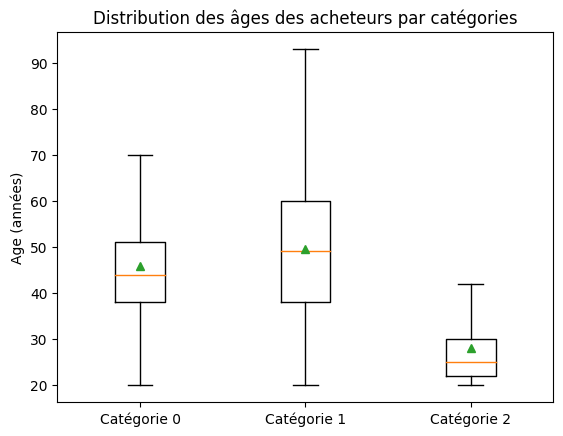

In [113]:
# Calcul des categories les plus achetees par âge:
categ = ventes["category"].unique()
categ_age = {categ: ventes.loc[ventes["category"]==categ, "age"] for categ in categ}

# Préparation des données pour le graphique
plt.boxplot([
    categ_age[0],
    categ_age[1],
    categ_age[2]]
    ,labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"],showmeans=True, showfliers=False)

# Gestion des titres et des labels
plt.title("Distribution des âges des acheteurs par catégories")
plt.ylabel("Age (années)")
plt.show()

In [90]:
# Test de Kruskal-Wallis
kw_stat, kw_p_value = kruskal(*categ_age.values())

# Affichage des résultats du test de Kruskal-Wallis
print(f"Statistique de Kruskal-Wallis : {kw_stat}")
print(f"p-value : {kw_p_value}")

# Interprétations des résultats
if kw_p_value < 0.05:
    print("La différence entre au moins deux des catégories est statistiquement significative (p < 0.05).")
    # Vous pouvez également effectuer des tests post-hoc pour déterminer quelles catégories diffèrent significativement.
else:
    print("Il n'y a pas de différence statistiquement significative entre les catégories (p >= 0.05).")


Statistique de Kruskal-Wallis : 78458.43837285662
p-value : 0.0
La différence entre au moins deux des catégories est statistiquement significative (p < 0.05).


Les résultats du test de Kruskal-Wallis indiquent une différence statistiquement significative entre au moins deux des catégories. Cela signifie que la distribution des âges varie de manière significative entre les catégories de produits.

Étant donné que la valeur p est inférieure à 0.05, nous rejetons l'hypothèse nulle selon laquelle les médianes des distributions d'âge sont égales pour toutes les catégories. Cela suggère qu'au moins une paire de catégories présente des différences significatives dans la distribution des âges des acheteurs.